In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
#nothing

In [5]:
tf.__version__

'2.12.0'

In [6]:
keras.__version__

'2.12.0'

In [7]:
from keras.datasets import fashion_mnist

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


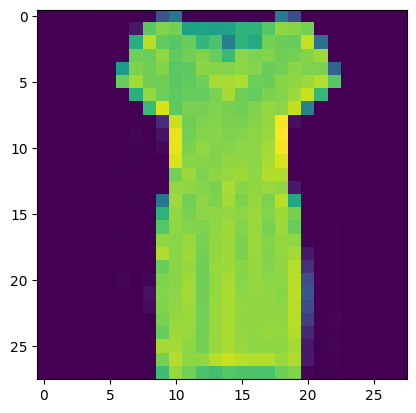

In [9]:
plt.imshow(X_train_full[20])

In [10]:
y_train_full[1]

0

In [11]:
class_names = ["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [12]:
class_names[y_train_full[20]]

'Dress'

In [13]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [14]:
X_train_n=X_train_full/255.
X_test_n=X_test/255.

In [15]:
X_valid, X_train = X_train_n[:5000],X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [16]:
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


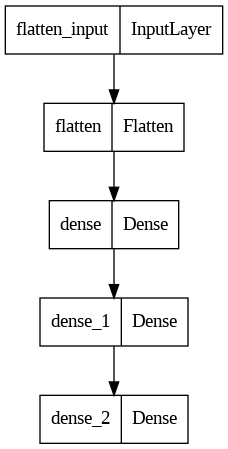

In [19]:
import pydot
keras.utils.plot_model(model)

In [20]:
weights, biases = model.layers[1].get_weights()

In [21]:
weights

array([[-0.03153627,  0.06352425,  0.04009376, ...,  0.01287328,
         0.03328545, -0.02455487],
       [-0.05648976,  0.06182958, -0.00062673, ..., -0.0268886 ,
        -0.0618376 ,  0.06414017],
       [-0.06138977, -0.07383889, -0.00350867, ..., -0.06276578,
         0.04859611, -0.00463471],
       ...,
       [-0.02695503,  0.03312498,  0.0145132 , ...,  0.02299117,
         0.07285772,  0.00944269],
       [ 0.0250873 , -0.02961416,  0.00950449, ...,  0.07119313,
         0.04654539, -0.05118761],
       [-0.03869719,  0.00706518, -0.02399875, ...,  0.04518522,
         0.07008074, -0.01998797]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [26]:
model_history = model.fit(X_train, y_train, epochs=30,
                          validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7145 - accuracy: 0.7665 - val_loss: 0.5236 - val_accuracy: 0.8224
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4867 - accuracy: 0.8291 - val_loss: 0.4382 - val_accuracy: 0.8532
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4409 - accuracy: 0.8445 - val_loss: 0.5404 - val_accuracy: 0.7968
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4144 - accuracy: 0.8554 - val_loss: 0.3975 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3956 - accuracy: 0.8614 - val_loss: 0.3773 - val_accuracy: 0.8686
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3773 - accuracy: 0.8678 - val_loss: 0.3744 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3642 - accuracy: 0.8712 - val_loss: 0.3672 - val_accuracy:

In [27]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [28]:
model_history.history

{'loss': [0.7145342826843262,
  0.4867340922355652,
  0.44091832637786865,
  0.4143580198287964,
  0.39556989073753357,
  0.37729644775390625,
  0.3642185628414154,
  0.35301071405410767,
  0.34213799238204956,
  0.3326829969882965,
  0.32411226630210876,
  0.315591037273407,
  0.3086939752101898,
  0.30270540714263916,
  0.295301228761673,
  0.2900814712047577,
  0.284622460603714,
  0.2783234417438507,
  0.27401381731033325,
  0.26880258321762085,
  0.2637675702571869,
  0.25930798053741455,
  0.2546694576740265,
  0.25067493319511414,
  0.24638856947422028,
  0.2417047768831253,
  0.23858873546123505,
  0.23520591855049133,
  0.2305622547864914,
  0.22731883823871613],
 'accuracy': [0.7665454745292664,
  0.8291272521018982,
  0.8445090651512146,
  0.855436384677887,
  0.8614181876182556,
  0.8678181767463684,
  0.8712363839149475,
  0.8728363513946533,
  0.8787636160850525,
  0.8808727264404297,
  0.8842545747756958,
  0.8862909078598022,
  0.88919997215271,
  0.8905272483825684,
  

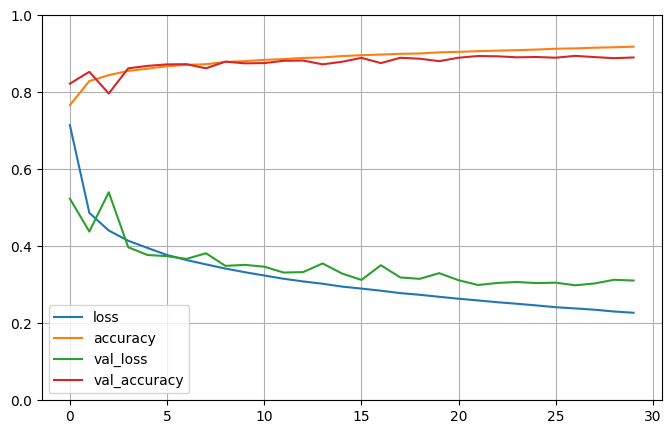

In [29]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3411 - accuracy: 0.8783


[0.34105879068374634, 0.8783000111579895]

In [32]:
X_new = X_test[:3]

In [39]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 34ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [43]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])

In [44]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(size=(28, 28))


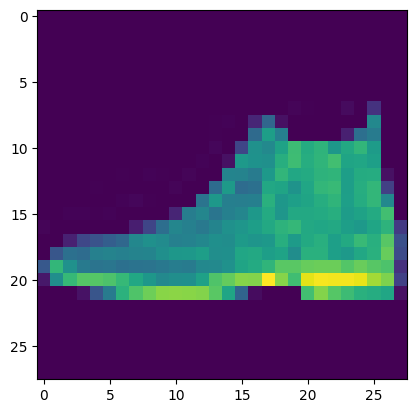

In [45]:
print(plt.imshow(X_test[0]))

AxesImage(size=(28, 28))


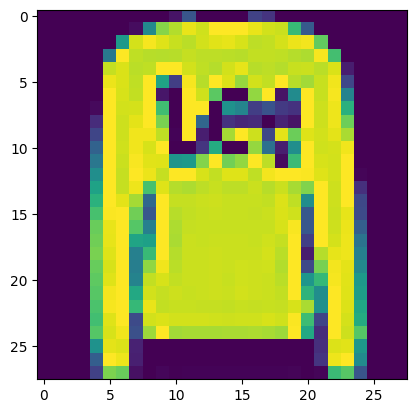

In [46]:
print(plt.imshow(X_test[1]))

AxesImage(size=(28, 28))


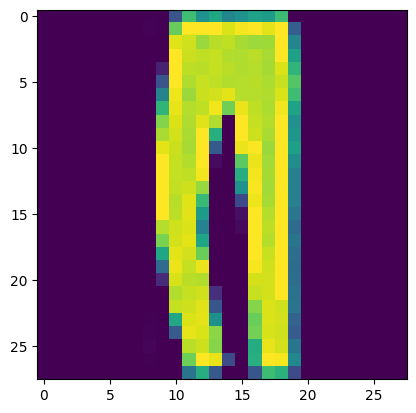

In [47]:
print(plt.imshow(X_test[2]))